# GMM for Clustering

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [0]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

### Synthetic data generation

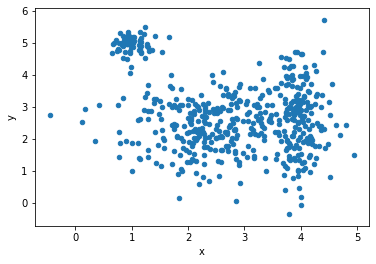

In [3]:
# generate 2d classification dataset
cent = [[1,5],[2.5,2.5],[4,2.5]]
dev = [[0.2,0.2],[0.85,0.85],[0.2,1]]

X1, y1 = make_blobs(n_samples=[70,300,150], centers=cent, n_features=2, cluster_std=dev , random_state=50)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X1[:,0], y=X1[:,1], label=y1))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y')#, label=key, color=colors[key])
plt.show()

 ### GMM Clustering and Visualization

In [0]:
def plot_gmm(gmm, X, label=True, ax=None):
#     ax = ax or plt.gca(figsize=(30,10))
    f, ax = plt.subplots(1, 1, sharey=True, figsize=(10,10))
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    ax.set_title("Color coded with the assignment to highest probablity cluster")
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

def plot_gmm_dist(gmm, X, label=True, ax=None):
#     ax = ax or plt.gca(figsize=(30,10))
    f, ax = plt.subplots(1, 1, sharey=True, figsize=(10,10))
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    ax.set_title("Visualization of the final Gaussian distribution")
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

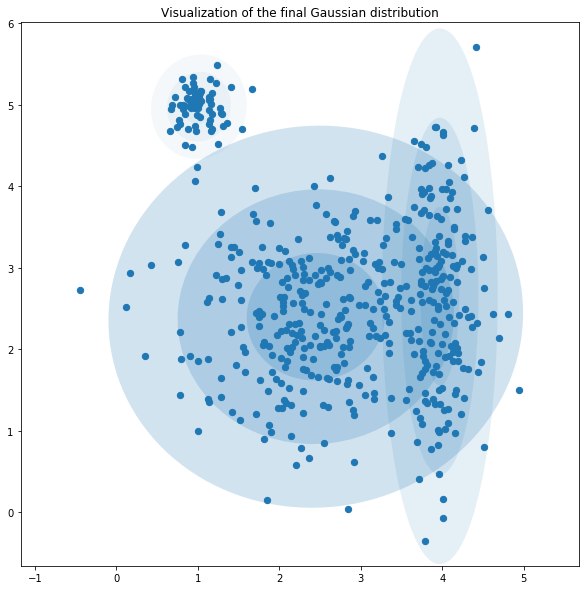

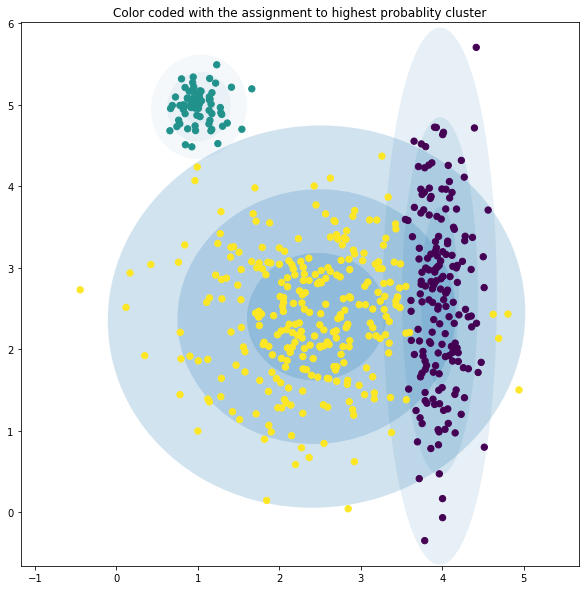

In [5]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X1)
plot_gmm_dist(gmm,X1)
plot_gmm(gmm, X1)

### Comparison between GMM and K-Means

In [0]:
def plot_gmm_vs_kmeans(gmm, kmeans,  X, label=True, ax=None):

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(30,10))
    
    labels_gmm = gmm.fit(X).predict(X)
    labels_kmean = kmeans.fit_predict(X)
    
    ax2.scatter(X[:, 0], X[:, 1], c=labels_gmm, s=40, cmap='jet', zorder=2)
    ax1.scatter(X[:, 0], X[:, 1], c=labels_kmean, s=40, cmap='jet', zorder=2)
       
    ax2.set_title('GMM clusters')
    ax1.set_title('Kmeans clusters')
    
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.show()
    

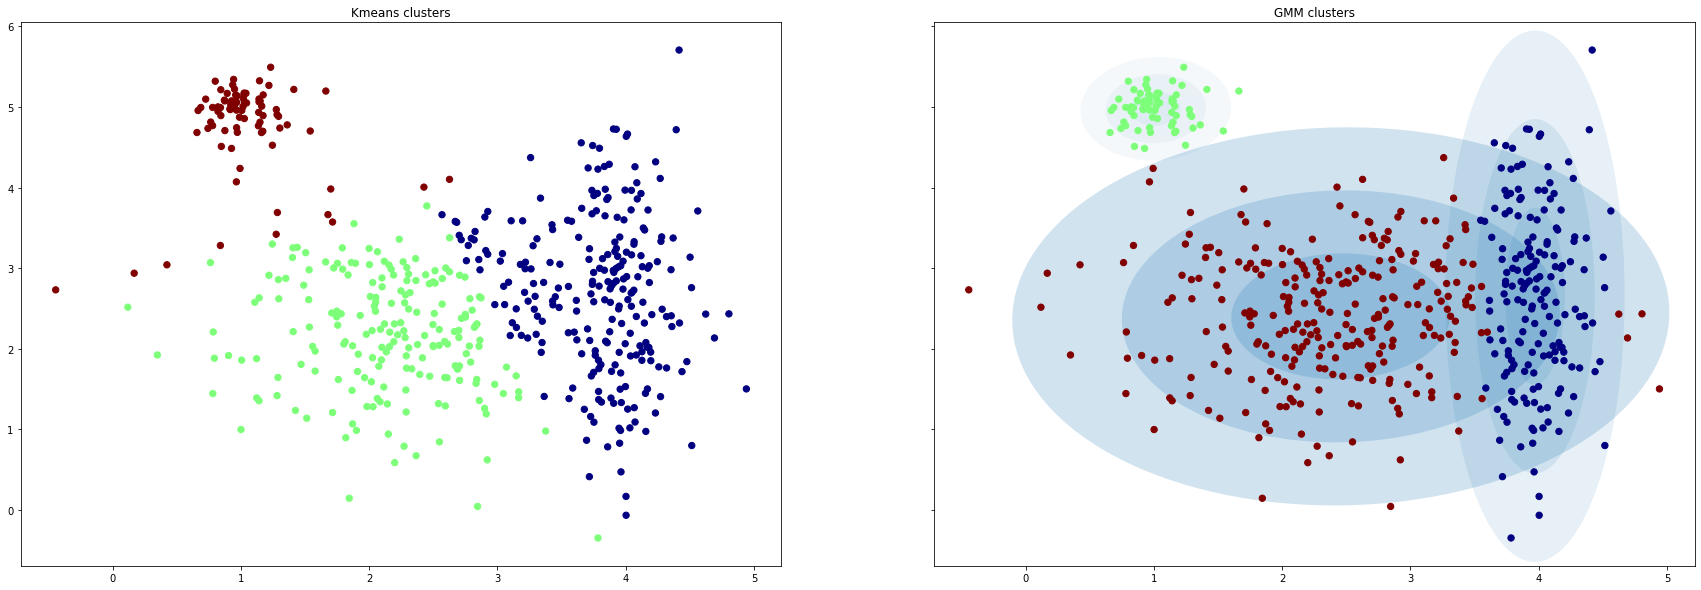

In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=30)
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X1)
plot_gmm_vs_kmeans(gmm,kmeans, X1)